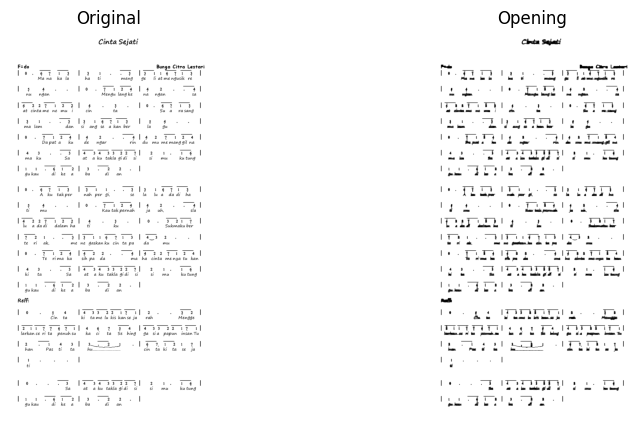

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def show_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Baca gambar dalam skala abu-abu
image = cv2.imread('notasiangkacitra.png', 0)

# Buat struktur elemen berbentuk persegi dengan ukuran 5x5
kernel = np.ones((5, 5), np.uint8)

# # Operasi Dilasi
# dilated = cv2.dilate(image, kernel, iterations=1)

# # Operasi Erosi
# eroded = cv2.erode(image, kernel, iterations=1)

# Operasi Opening (Erosi diikuti dengan Dilasi)
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# # Operasi Closing (Dilasi diikuti dengan Erosi)
# closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Tampilkan hasil
show_images([image, opened, ],
            ['Original', 'Opening'])

In [ ]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
 
src = None
erosion_size = 0
max_elem = 2
max_kernel_size = 21
title_trackbar_element_shape = 'Element:\n 0: Rect \n 1: Cross \n 2: Ellipse'
title_trackbar_kernel_size = 'Kernel size:\n 2n +1'
title_erosion_window = 'Erosion Demo'
title_dilation_window = 'Dilation Demo'
 
 
 
def main(image):
    global src
    src = cv.imread(cv.samples.findFile(image))
    if src is None:
        print('Could not open or find the image: ', image)
        exit(0)
 
    cv.namedWindow(title_erosion_window)
    cv.createTrackbar(title_trackbar_element_shape, title_erosion_window, 0, max_elem, erosion)
    cv.createTrackbar(title_trackbar_kernel_size, title_erosion_window, 0, max_kernel_size, erosion)
 
    cv.namedWindow(title_dilation_window)
    cv.createTrackbar(title_trackbar_element_shape, title_dilation_window, 0, max_elem, dilatation)
    cv.createTrackbar(title_trackbar_kernel_size, title_dilation_window, 0, max_kernel_size, dilatation)
 
    erosion(0)
    dilatation(0)
    cv.waitKey()
 
 
# optional mapping of values with morphological shapes
def morph_shape(val):
    if val == 0:
        return cv.MORPH_RECT
    elif val == 1:
        return cv.MORPH_CROSS
    elif val == 2:
        return cv.MORPH_ELLIPSE
 
 
 
def erosion(val):
    erosion_size = cv.getTrackbarPos(title_trackbar_kernel_size, title_erosion_window)
    erosion_shape = morph_shape(cv.getTrackbarPos(title_trackbar_element_shape, title_erosion_window))
 
    
    element = cv.getStructuringElement(erosion_shape, (2 * erosion_size + 1, 2 * erosion_size + 1),
                                       (erosion_size, erosion_size))
    
    erosion_dst = cv.erode(src, element)
    cv.imshow(title_erosion_window, erosion_dst)
 
 
 
 
def dilatation(val):
    dilatation_size = cv.getTrackbarPos(title_trackbar_kernel_size, title_dilation_window)
    dilation_shape = morph_shape(cv.getTrackbarPos(title_trackbar_element_shape, title_dilation_window))
 
    element = cv.getStructuringElement(dilation_shape, (2 * dilatation_size + 1, 2 * dilatation_size + 1),
                                       (dilatation_size, dilatation_size))
    dilatation_dst = cv.dilate(src, element)
    cv.imshow(title_dilation_window, dilatation_dst)
 
 
 
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Code for Eroding and Dilating tutorial.')
    parser.add_argument('--input', help='Path to input image.', default='LinuxLogo.jpg')
    args = parser.parse_args()
 
    main(args.input)

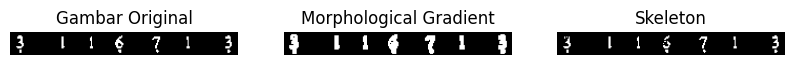

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def show_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Baca gambar dalam skala abu-abu
image = cv2.imread('blok 3.png', 0)

# Konversi ke biner
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Buat struktur elemen berbentuk persegi dengan ukuran 3x3
kernel = np.ones((3, 3), np.uint8)

# Operasi Morphological Gradient (Dilasi - Erosi)
gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)

# Skeletonization
size = np.size(binary_image)
skeleton = np.zeros(binary_image.shape, np.uint8)

temp_image = binary_image.copy()
while True:
    eroded = cv2.erode(temp_image, kernel)
    temp_dilated = cv2.dilate(eroded, kernel)
    temp = cv2.subtract(temp_image, temp_dilated)
    skeleton = cv2.bitwise_or(skeleton, temp)
    temp_image = eroded.copy()
    if cv2.countNonZero(temp_image) == 0:
        break

# Tampilkan hasil
show_images([binary_image, gradient, skeleton],
            ['Gambar Original', 'Morphological Gradient', 'Skeleton'])
